Lecture Notes for session conducted on September 09 2022

https://www.scaler.com/academy/mentee-dashboard/class/34698/session

**Content**

1.   TF2 and Keras code for Sequential API.
2.   TF2 and Keras code for Functional API.
3.   Dropout (Regularization through randomization).
4.   CPU v/s GPU.
5.   TensorBoard and Computational Graph.
6.   Batch Normalization.

#### TF2 and Keras (Sequential API)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Keras has some inbuilt datasets to work with.

***Question:*** Is there any classical ML model which can be used when number of classes is much larger, lets say 100?

***Answer:***
- Strategy 1 v/s rest can be used in Logistic Regression.
- KNN can also be used if 100 classes are well separated.
- Dimension reduction using UMAP and Tree based methods like Decision Tree, Gradient Boost Decision Tree, Random Forest can be used. UMAP is used as it is faster and preserves Global structure better.
- Softmax Classifier can be used as well. Think of it as Classical ML model.
 <img src='https://drive.google.com/uc?id=1fLO9ZMPRIdcP_jMm28-E51nb05lyNj7y'>


***Question:*** If classes are too high, does a decision tree or RF perform well? or generally it performs better on binary classification?

***Answer:***
- For each class as long as you have good amount of data, it should be ok.
- If classes are more, people go to Deep Learning models.

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Here, we have 60,000 images in training data each of size 28 by 28 pixels as inputs. For each image we have entry in $y_{train}$ which is an integer representing the number in the image.

Similarly, we have 10,000 images in test set with its correponding labels in $y_{test}$

3


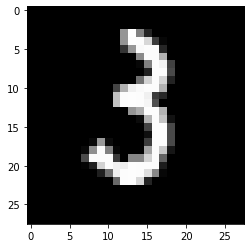

In [ ]:
idx=1234
plt.imshow(x_train[idx], cmap='gray', interpolation='none')
print(y_train[idx])

***Question:*** Can we pose a 100 class classification problem as regression? Why? or Why not?

***Answer:***
- Ordinality is important in Regression. If data has no ordinality, then we can't.
- Scale is needed. For e.g. let say we have classes $C_1,C_2...C_{100}$ where $C_1 \to White \ (255)$ and $C_{100} \to Black \ (0)$. So a perfect $Grey$ would lie in between $(128)$.
  <img src='https://drive.google.com/uc?id=1w8TqO24wiFZVcUtimgGRWdu5XbxVu-RB'>
  

***Question:*** From Entropy/gini minimization POV (getting "pure nodes" as quickly as possible),  what impact will having higher number of classes have?

***Answer:***
- Entropy is represented as $-\sum p_i log(p_i)$.
- Imagine we have $2$ classes with $P_1 = 0.5$ and $P_2 = 0.5$ as probabilities for each of them. Imagine we have $10$ classes with probabilities $P_1, P_2,....P_{10}$ equal to $0.1$ for each of them.
- If we substitute these values, then we get values as $0.3010$ for $2$ classes and $1$ for $10$ classes.
- This shows that if we have more classes, then entropy calculation certainly gets impacted. But here, we are interested in difference in entropy. So it does impact.
  <img src='https://drive.google.com/uc?id=1d7IDkhbzLWLBqoWEpjjV6p7gTEUfj3km'>
  

In [ ]:
# number of class labels
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [ ]:
# convert y_i's to one-hot vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Since, we want to use Categorical Cross Entropy for loss, we need to use One-hot encoding.

In [ ]:
# Image: 2D matrix to 1D vector
image_size = x_train.shape[1]
input_size = image_size * image_size

# 2D to 1D + Normalize (0-255)
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

- A 2-D image of 28 by 28 pixels, is converted to 1D by placing each row in 2D representation one after the other to form a 1D representation.
  <img src='https://drive.google.com/uc?id=16l3Ptw15bBIkZfb0LEmwDltVl7SLGxIt'>


- Till now, we have used standardization of data i.e. Mean-centering and variance scaling.
- But for images, we use normalization i.e. min-max scaling.
- Typically in images we know that $0 \to Black$ and $255 \to White$. If standardization was used, then we would have negative values that cannot be interpreted.
- But if we use normalization, then we know that $0 \to Black$ and $1 \to White$ with values in between representing various shades of grey.
- Hence,normalization is used.
  <img src='https://drive.google.com/uc?id=1jnPINiPpUSrgSyCjw33hY3q021T58w9k'>
  

In [ ]:
# Hyper-params of NN
batch_size = 128 # typically 2^n
hidden_units = 256

- Batch-size is set to 128. Typically it is $2^n$. This will be discussed in GPU section.
- Hidden layer will contain 256 Neurons.

***Question:*** For a colored image, will we still do min max scaling as the distinction might not e between black and white only?

***Answer:***
- Any color is represented as RGB (Red,Green,Blue) each having a value between $0-255$.
- Even here, we do min-max scaling. $Black \to 0,0,0$, $White \to 1,1,1$, $Red \to 1,0,0$ and so on.
  <img src='https://drive.google.com/uc?id=1Ug79O2c8xHk3L-c3nzLd7vUiH-QNZcVw'>

***Question:*** What does batch size of 128 signify? Here 128 is the number of data points that we pass correct?

***Answer:***
- Each epoch has multiple iterations. In each iteration, we have random subset which is 'batch size'.
- It corresponds to how many points we are passing in one iteration.

In [ ]:
# Sequential API

# 3-layer MLP with ReLU
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trai

***Question:*** How are number of parameters computed in the above summary?

***Answer:***
- Input is of shape 784*Batch Size which is densely connected to 256 Neurons. So parameters are computed as $(784*256) \ weights + 256 \ for \ biases = 200960$.
  <img src='https://drive.google.com/uc?id=1lwU9IQrn4Yo_QBGQoU3E9JaX-s9Qtl_c'>

***Question:*** Is there a rule of thumb we can follow to determine hidden_layers and neurons in each hidden_layers?

***Answer:***
- Here single input each of size $784*1$ is passed through Neural network setup to get an output that is of size $10*1$.
- So, we want the interemediate layers that are reducing.
- Why 256?. Well it could be anything and hence it's a hyper parameter.
  <img src='https://drive.google.com/uc?id=18c1nDwiXSSZQxwTH6gXuejmAhIsgKU3X'>


*Note:* As we increase layers, we will certainly overfit.


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

We have $60,000$ images in training set. So for $20$ epochs and $128$ batch-size, we have $60,000/12 \approx 469$ images used in 1 iteration of epoch.

In [ ]:
# train the network
%%time
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

#60000/128 ~ 469

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.2583 - accuracy: 0.9250
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0967 - accuracy: 0.9708
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0624 - accuracy: 0.9800
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0458 - accuracy: 0.9858
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0332 - accuracy: 0.9893
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0273 - accuracy: 0.9909
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0201 - accuracy: 0.9940
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0165 - accuracy: 0.9947
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0171 - accuracy: 0.9943
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0159 - accuracy: 0.9945

*Note:*
%%time in Python computes the execution time.

In [ ]:
# test dataset  performance
loss, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print(loss)

# Overfit or Underfit?


Test accuracy: 97.9%
0.10156406462192535


***Question:*** Do you think the model has performed well on test set?

***Answer:***
- Training loss is $0.0066$ with accuracy as $99.7\%$, whereas test loss is $0.10$ with accuracy as $97.9\%$
- Even though test loss is very small the difference between train loss and test loss is quite significant.
- Accuracy is just a business matrix. We are optimizing for log-loss.
  <img src='https://drive.google.com/uc?id=18i_fuxSqEcF2ZcMHknDlohbo674MjgrV'>


*Note:* Screenshot values may not match with values we get when running the code as samples are drawn randomly.

***Question:*** Is one iteration / step is one forward and then one back propagation?

***Answer:***
- Yes, that is correct.

#### TF 2 and Keras: Functional API

In [ ]:
print(x_train.shape)

(60000, 784)


In [ ]:
inputs = keras.Input(shape=(784,))
inputs.shape

TensorShape([None, 784])

In [ ]:
# Functional API: much more intuitive
# Refer: https://www.tensorflow.org/guide/keras/functional
x1 = layers.Dense(hidden_units, activation="relu")(inputs)
x2 = layers.Dense(hidden_units, activation="relu")(x1)
outputs = layers.Dense(num_labels, activation="softmax")(x2)

model = keras.Model(inputs=inputs, outputs=outputs, name="simple_model")
model.summary()


Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


- Sequential API is good when we have sequential layers.
- But imagine if we have complex multi-input setup as follows with non-sequential connections.
  <img src='https://drive.google.com/uc?id=1bILPP5WcYYEHWOuKtQmvIwgpvmCRCadB'>
- In such scenarios Functional APIs are easy to use.



  

- We can plot the architecture of Neural Network setup using Functional API as follows:

  <img src='https://drive.google.com/uc?id=1qWubyCtVZTWoe5-NTAak8yl0Ps6OTRmO'>

  <img src='https://drive.google.com/uc?id=10JadG1bO6bwZjXeG0kZthjpUnC2wA8y9'>

***Question:*** Why do we only use linear weighted layers being passed through non linear activation functions? Can we also use lets say tree based network for any layers?

***Answer:***
- People have designed tree based networks but those haven't out performed.
- Matrix multiplication in DL can be done much faster using modern gaming hardware.

- While using functional API, input of size (784,) $(inputs)$ is passed to dense layer with 256 neurons using ReLu activations function for each of the neuron $x_1$.
- $x_1$ is further passed to a dense layer with 256 neurons using ReLu activations function for each of the neuron $x_2$.
- $x_2$ is passed to a dense layers with 10 neurons using Softmax layer which generates output.
  <img src='https://drive.google.com/uc?id=1dhrTYnP9MCT3pf2orpYp2r9Dmo8y-_TT'>


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# train the network
%%time
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)


Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.2543 - accuracy: 0.9259
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0951 - accuracy: 0.9713
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0623 - accuracy: 0.9805
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0457 - accuracy: 0.9855
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0337 - accuracy: 0.9891
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0268 - accuracy: 0.9914
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0212 - accuracy: 0.9931
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0166 - accuracy: 0.9947
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0186 - accuracy: 0.9937
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0111 - accuracy: 0.9963

#### Summary of API:

There are 2 ways to design Deep Learning Architecture:
- Sequential API.
- Functional API.

For non-sequential model, Functional API is useful.

#### Dropout: Regularization through randomization

##### Intuition:

- In Random forests, base learners are deep trees i.e. they are high variance models. Trick used here is row-sampling or column-sampling.
- We take average of each base learners using majority voting. So in Random forests, we used randomization for regularization.
- Similar strategy is used in Dropouts.

***Trivia:*** Dropout was a Masters Thesis published by Nitish Srivastava.

https://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf

- Imagine we have a Fully connected Neural Network for binary class classification problem.
- Dropout basically says when we pass a batch of inputs to the model, we randomly drop/ignore some edges or the neurons itself.
- What it means that we won't update weights and biases for some of the neurons.
- Neurons are randomly selected using $dropout \ rate$. For example let say, dropout rate = $20\%$. Then it is across entire network and not just single layer.
  <img src='https://drive.google.com/uc?id=14EcbXOS5WyngmfHdn_qNrcI9N40tLg0H'>

##### Implementation:

- For every neuron, get a random number between $0 \to 1$.
- Let  dropout rate is $20\%$.
- If for a neuron the randomly generated number is $\le 0.2$, then ignore that neuron.

  <img src='https://drive.google.com/uc?id=1Lw02ZYg-h7FZpmtrNJRfb8CsDeguLere'>

- Here, we are randomly selecting neurons to drop-off.
- Imagine we have dropout = $20\%$. Let say we have $20$ epochs with 500 iterations in each epoch. In total, we have $10,000$ iterations.
- Of these $10,000$ iterations, a neuron did not contribute to network for $2000$ iterations.
- So everytime, we trained only $80\%$ of neurons.
  <img src='https://drive.google.com/uc?id=14K2fwR3TdJ2wg7bCdofSFIQTvUN0UDiD'>
- When we have more layers, then we have computationally more weights and biases to learn.
- More neurons means we have more computational power of network and we can learn a more complex thing.
- Here we use Dropout, if we don't want to overfit.


***Question:*** Is dropout only for computional reduce or any significant change in results?

***Answer:***
- No. It is done to regularize model, so that it doesn't overfit.

***Question:*** Rather than this, why not have lesser neurons in the hidden layer? It will not overfit right?

***Answer:***
- Moment we reduce neurons, model's capacity to learn has reduced.
- Ideally we want model to capture non-linearity without overfitting.

##### 2 approaches for Dropout:

- We either dropoff a neuron or we drop an edge itself.

*Note:* In TF2, the edge is dropped-off.

***Question:*** Turning off of a particular neuron happens for the whole epoch, or it changes in every iteration of an epoch?

***Answer:***
- This is more of an engineering choice rather than Scientific one.
- Ther are some libraries that implement it for an iteration, while some that do it for an epoch.

#### Important aspects of Dropout:

##### Training:

- Imagine we multiple neurons and have implemented edge level dropouts.
- Let there be 4 inputs $i_1, i_2,i_3,i_4$ as inputs to a neuron of which edge from $i_1$ is dropped out.
- In Forward propogation, all the inputs will flow but edge from $i_1$ is zeroed out.
- Output of the neuron is computed as $ReLu(0+i_2*w_2+i_3*w_3+i_4*w_4)$.
- In back propogation, derivative of this output is computed as $\frac{\partial L}{\partial O_p}$. Here we don't calculate partial derivative wrt $w_1$ and we only update $w_2,w_3,w_4$.
  <img src='https://drive.google.com/uc?id=10vcSJnlnGl4wluZHJ3-u71EruQOmulZO'>
  

##### Test Time:

- We multiply weights with probability '$p$'. Let say, the edge was present $80\%$ of times. At test time, $w^k_{ij}$ is computed as $(1-r)*w^k_{ij}$, where $r$ is dropout rate.
  <img src='https://drive.google.com/uc?id=1piDD9RVfxEJh8PiTRyclRSxeAUzh98fA'>
- Doing so, we do not skip any edge.
  <img src='https://drive.google.com/uc?id=1P_6kORU9wuC9jrBEskMnK-cQDJ9EOUfT'>


  

***Question:*** If we use ReLu, then also there is possibility of some input to be 0. Does it makes things worse for Dropout, or it helps?

***Answer:***
- No, it does not impact.
  <img src='https://drive.google.com/uc?id=1_fcR8XzJMBpodRXWyWSncE95AG7tG7eB'>


***Question:*** But the chain rule breaks if we ignore that edge. We might have used the weight from its previous chain?

***Answer:***
- No, it does not.
- For e.g. in the below network setup, let say we drop the edge from $f_{11}$ to $f_{21}$.
- Partial derivative of Loss ($L$) wrt to $w_1$ is computed as:
$$\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial O_{31}} * \frac{\partial O_{31}}{\partial O_{22}} * \frac{\partial O_{22}}{\partial O_{11}} * \frac{\partial O_{11}}{\partial w_{1}}$$
  <img src='https://drive.google.com/uc?id=1j4jnR1mUu1WtZh-K8NWPCIvmeDF2FTWS'>


#### Performance Comparison:

- In the below graph, we are comparing 4 different architectures with and without dropout.
- Without dropout, error keeps oscillating without much improvement.
- But with dropout, there is a significant reduction in error.  
  <img src='https://drive.google.com/uc?id=1QkFF5wiIHZZ76c96GiXuKmzmZFw95VG2'>
- Notice, there is a reduction in error even if there are more iterations.

#### Dropout Code:

In [ ]:
# Model with Dropout
x = layers.Dense(hidden_units, activation="relu")(inputs)
x = Dropout(0.3)(x)
x = layers.Dense(hidden_units, activation="relu")(x)
x = Dropout(0.3)(x)
outputs = layers.Dense(num_labels, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="simple_model")
model.summary()


Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-tr

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
%%time
# Increased epochs as we added dropouts
model.fit(x_train, y_train, epochs=30, batch_size=batch_size)

Epoch 1/30
469/469 [==============================] - 4s 8ms/step - loss: 0.3441 - accuracy: 0.8970
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1491 - accuracy: 0.9553
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1161 - accuracy: 0.9643
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0934 - accuracy: 0.9707
Epoch 5/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0793 - accuracy: 0.9749
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0705 - accuracy: 0.9774
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0634 - accuracy: 0.9801
Epoch 8/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0562 - accuracy: 0.9824
Epoch 9/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0533 - accuracy: 0.9829
Epoch 10/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0477 - accuracy: 0.9842

In [ ]:
# test dataset  performance
loss, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print(loss)

# Overfit or Underfit?
# Can we add more layers?


Test accuracy: 98.4%
0.07547812163829803


Training Loss: $0.02$ with Accuracy: $99.24\%$ Test Loss: $0.07$ with Accuracy: $98.4\%$

Even though there is a difference between loss, it is much smaller in comparison to setup without dropout.



***Question:*** If the edge between an input and next layer is dropped off, what value is assigned to its weight?

***Answer:***
- Imagine we have a setup like below. The edge $w^1_{11}$ is randomly initialized to a value initially (Let say $0.1$)
- In iteration 1, if the edge is dropped off, then it is not updated.
- In the next iteration, $w^1_{11}$ is updated as $w^1_{11} = 0.1 - \eta* \frac{\partial L}{\partial w^1_{11}}$.
  <img src='https://drive.google.com/uc?id=1kNs5zxvWYZZLwMtDFjChCeheBQXjFGwn'>
  

***Question:***
1. Why is logistic regression considered as a linear classifier ? Is it only bcoz the underlying separator is a hyper plane ? The output is derived from the sigmoid function which is non linear in nature. So why is it not considered as a non linear separator?

2. Perceptron can only separate linear data. But as we have learnt that the activation functions are non linear. Then why can it not classify non linear data ?

***Answer:***
- Yes, Decision boundary is linear separation. We apply Sigma function to get probabilities between 0 and 1.
- Perceptron is basically like applying step function.
- In logistic regression, Ƶ represents how far away is the point from hyperplane and on which side does it it lie.
  <img src='https://drive.google.com/uc?id=1RB_STGn1JQgPCAtfrG8XgIqNOlNBbqOG'>
  

  

***Question:*** What is derivative of ReLu function $ReLu(Ƶ)$, where $Ƶ=3*x+5$?

***Answer:***
- $ReLu(Ƶ)$ is defined as $max(0,Ƶ)$.
- It's derivative is $+1$ for $x>0$, undefined at $0$ and $0$ when $x<0$.
- Derivative is computed as:
$$\frac{\partial ReLu(3x+5)}{\partial x} = \frac{\partial ReLu(Ƶ)}{\partial Ƶ} * \frac{\partial (3x+5)}{\partial x}$$
- This comes out to be 3.

  <img src='https://drive.google.com/uc?id=1uinQf7h6OoJAwfLaFa7VeaBdChCw8aFJ'>
  


***Question:*** If we have 2 datasets of same dimensions(same N, d). The first one has two classes (no imbalance). The other one has, say, 20 classes(no imbalance). If we are training using decision trees, will we get "pure nodes" more quickly on the second dataset(multiclass) compared to the first(binary) one?

***Answer:***
- Not necessary, it all depends upon how well separated the classes are. If they are not then getting pure nodes will take time.
  <img src='https://drive.google.com/uc?id=1rl8AB3RzoCY7Ucd9NTSkgkaABm8nZbkC'>
  



#### Note:

Following topics will be covered in next the class:

-   CPU v/s GPU.
-   TensorBoard and Computational Graph.
-   Batch Normalization.